In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [540]:
titanic = pd.read_csv('./titanic/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [541]:
titanic = titanic.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare']) # supprimer les colonnes inutiles
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [542]:
titanic.isna().sum() # somme des données manquantes par colonne
titanic = titanic.dropna() # supprimer les données maquantes
titanic
#titanic.fillna(value={'Age' :titanic['Age'].mean()}, inplace= True)
#titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


In [543]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584
std,0.491139,0.836854,14.492933,0.930692,0.854181
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000


In [544]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

# Modèle de ML (KNN)

In [545]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic.Sex=le.fit_transform(titanic.Sex)
titanic.Embarked=le.fit_transform(titanic.Embarked)
titanic

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,1
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
889,1,1,1,26.0,0,0,0


In [546]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = titanic['Survived']
# X #  dataframe
# y #  Series

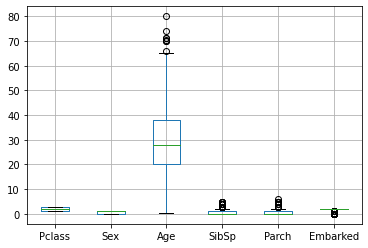

In [547]:
X.boxplot()

In [548]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [577]:
X_train_f,X_test_f,y_train_f,y_test_f = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42)

In [578]:
X_train_f.shape ,X_test_f.shape ,y_train_f.shape ,y_test_f.shape

((569, 6), (143, 6), (569,), (143,))

In [549]:
X_train.shape

(569, 6)

In [550]:
X_test.shape

(143, 6)

In [551]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [552]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.28934006, -1.31741297,  0.24100362,  0.52133471,  1.89356532,
         0.49421974],
       [-0.28934006, -1.31741297,  0.87559868,  0.52133471, -0.48226416,
         0.49421974],
       [-0.28934006,  0.75906343, -0.32308088, -0.54956583, -0.48226416,
         0.49421974],
       ...,
       [ 0.91237159,  0.75906343,  1.08713037, -0.54956583, -0.48226416,
         0.49421974],
       [-0.28934006,  0.75906343, -1.52176045,  0.52133471,  0.70565058,
         0.49421974],
       [ 0.91237159,  0.75906343, -0.6756337 , -0.54956583, -0.48226416,
         0.49421974]])

In [553]:
X_test=scaler.transform(X_test)


In [554]:
# 1st method : suivant la littérature, k optimal est la racine carré du nb d'obs 
np.sqrt(X_train.shape[0])

23.853720883753127

In [555]:
k = 24

In [556]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [557]:
# Train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [558]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [559]:
y_test.values

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [560]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[73,  7],
       [24, 39]])

In [561]:
# la même chose que la commande précednete
y_index = ['0 : Died', '1 : Survived']
pd.DataFrame(conf_mat, columns=y_index, index=y_index)

,0 : Died,1 : Survived
0 : Died,73,7
1 : Survived,24,39


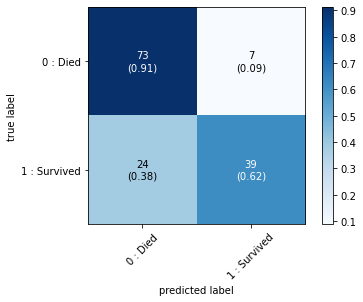

In [562]:

import mlxtend.plotting
from mlxtend.plotting import plot_confusion_matrix

class_names = y_index

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)

In [563]:
acc = conf_mat.diagonal().sum()/conf_mat.sum()
acc

0.7832167832167832

# Accuracy score : 78.32 %

In [564]:
err = 1 - acc
err * 100

21.678321678321677

# Prédiction sur la Survie des passagers

In [565]:
from sklearn.neighbors import KNeighborsClassifier

In [566]:
model = KNeighborsClassifier()
y = titanic['Survived']
X = titanic.drop('Survived', axis=1)
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation

0.8455056179775281

In [567]:
def survie(model, Pclass=3, Sex=0, Age=25, SibSp= 1, Parch=0, Embarked=2):
  x = np.array([Pclass, Sex, Age, SibSp, Parch, Embarked]).reshape(1, 6)
  print(model.predict(x))
  print(model.predict_proba(x))

In [568]:
survie(model)

[0]
[[0.8 0.2]]


# Prédiction sur la Pclasse des passagers

In [569]:
model = KNeighborsClassifier()
y = titanic['Pclass']
X = titanic.drop('Pclass', axis=1)
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation

0.702247191011236

In [570]:
def Classe(model, Survived=1, Sex=1, Age=10, SibSp= 1, Parch=2, Embarked=2):
  x = np.array([Survived, Sex, Age, SibSp, Parch, Embarked]).reshape(1, 6)
  print(model.predict(x))
  print(model.predict_proba(x))

In [571]:
Classe(model)

[3]
[[0.2 0.  0.8]]


In [572]:
def finding_outliers(data, variable_name):
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    lower = data[variable_name].quantile(0.25) - 1.5*iqr
    upper = data[variable_name].quantile(0.75) + 1.5*iqr
    return data[(data[variable_name]< lower) | (data[variable_name]> upper)]

In [573]:
finding_outliers(titanic,'Age').sort_values('Age')

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
33,0,2,1,66.0,0,0,2
672,0,2,1,70.0,0,0,2
745,0,1,1,70.0,1,1,2
116,0,3,1,70.5,0,0,1
96,0,1,1,71.0,0,0,0
493,0,1,1,71.0,0,0,0
851,0,3,1,74.0,0,0,2
630,1,1,1,80.0,0,0,2


In [574]:
iqr_age =titanic['Age'].quantile(0.75) - titanic.quantile(0.255)
titanic['Age'].quantile(0.75) + 1.5* iqr_age
#tt les points sup a 65 sont considire comme valeur aberantes

Survived    95.0
Pclass      93.5
Sex         95.0
Age         63.5
SibSp       95.0
Parch       95.0
Embarked    92.0
Name: 0.255, dtype: float64

In [575]:
titanic.loc[(finding_outliers(titanic,'Age').index,'Age')]=titanic['Age'].quantile(0.75) + 1.5 * iqr_age


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


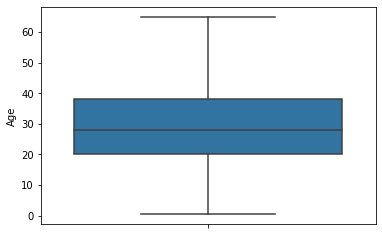

In [576]:
sns.boxplot(y='Age',data=titanic)